 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [12/Jan/2024 16:48:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 16:48:37] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [12/Jan/2024 16:48:38] "GET /settings HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 16:48:38] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [12/Jan/2024 16:48:54] "POST /settings HTTP/1.1" 302 -
127.0.0.1 - - [12/Jan/2024 16:48:54] "GET /upload HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 16:48:54] "GET /static/styles.css HTTP/1.1" 304 -


cw:  {'VL': [0, 0, 0.1], 'L': [0, 0.1, 0.3], 'ML': [0.1, 0.3, 0.5], 'M': [0.3, 0.5, 0.7], 'MH': [0.5, 0.7, 0.9], 'H': [0.7, 0.9, 1], 'VH': [0.9, 1, 1]}
r:  {'VP': [0, 0, 1], 'P': [0, 1, 3], 'MP': [1, 3, 5], 'F': [3, 5, 7], 'MG': [5, 7, 9], 'G': [7, 9, 10], 'VG': [9, 10, 10]}
m:  6
n:  4
k:  5
cdw:  [['H', 'VH', 'VH', 'VH', 'M'], ['M', 'H', 'VH', 'H', 'M'], ['M', 'MH', 'ML', 'VH', 'MH'], ['H', 'VH', 'MH', 'ML', 'MH']]
all_ratings:  [['VG', 'G', 'MG', 'F', 'G'], ['F', 'MG', 'MG', 'MG', 'F'], ['P', 'F', 'P', 'MP', 'P'], ['G', 'VG', 'MG', 'G', 'G'], ['MP', 'F', 'F', 'G', 'F'], ['F', 'VG', 'G', 'MG', 'VG'], ['MG', 'VG', 'G', 'G', 'MG'], ['MG', 'F', 'MP', 'G', 'F'], ['MG', 'MP', 'MG', 'F', 'MP'], ['MG', 'G', 'MG', 'VG', 'VG'], ['MP', 'G', 'F', 'F', 'F'], ['MP', 'P', 'VG', 'P', 'MP'], ['MG', 'VG', 'MG', 'VG', 'VG'], ['G', 'P', 'G', 'VG', 'G'], ['MG', 'VG', 'P', 'G', 'VG'], ['MG', 'F', 'MG', 'F', 'MG'], ['VP', 'P', 'G', 'G', 'P'], ['P', 'G', 'VP', 'MP', 'VP'], ['G', 'G', 'VG', 'VG', 'G'], ['G'

127.0.0.1 - - [12/Jan/2024 16:49:04] "POST /upload HTTP/1.1" 200 -
127.0.0.1 - - [12/Jan/2024 16:49:04] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [12/Jan/2024 16:49:04] "GET /static/fuzzy_topsis_plot.png HTTP/1.1" 200 -


Closeness coefficient =  [0.487, 0.508, 0.434, 0.553, 0.411, 0.432]
{'Alternativa 4': 0.553, 'Alternativa 2': 0.508, 'Alternativa 1': 0.487, 'Alternativa 3': 0.434, 'Alternativa 6': 0.432, 'Alternativa 5': 0.411}
CDW:  {'Odločevalec 1': ['H', 'VH', 'VH', 'VH', 'M'], 'Odločevalec 2': ['M', 'H', 'VH', 'H', 'M'], 'Odločevalec 3': ['M', 'MH', 'ML', 'VH', 'MH'], 'Odločevalec 4': ['H', 'VH', 'MH', 'ML', 'MH']}
tempAll:  {'Alternativa 1': [['VG', 'G', 'MG', 'F', 'G'], ['F', 'MG', 'MG', 'MG', 'F'], ['P', 'F', 'P', 'MP', 'P'], ['G', 'VG', 'MG', 'G', 'G']], 'Alternativa 2': [['MP', 'F', 'F', 'G', 'F'], ['F', 'VG', 'G', 'MG', 'VG'], ['MG', 'VG', 'G', 'G', 'MG'], ['MG', 'F', 'MP', 'G', 'F']], 'Alternativa 3': [['MG', 'MP', 'MG', 'F', 'MP'], ['MG', 'G', 'MG', 'VG', 'VG'], ['MP', 'G', 'F', 'F', 'F'], ['MP', 'P', 'VG', 'P', 'MP']], 'Alternativa 4': [['MG', 'VG', 'MG', 'VG', 'VG'], ['G', 'P', 'G', 'VG', 'G'], ['MG', 'VG', 'P', 'G', 'VG'], ['MG', 'F', 'MG', 'F', 'MG']], 'Alternativa 5': [['VP', 'P', 'G

127.0.0.1 - - [12/Jan/2024 17:16:15] "GET /static/fuzzy_topsis_plot.png HTTP/1.1" 304 -
127.0.0.1 - - [12/Jan/2024 17:16:15] "GET /static/styles.css HTTP/1.1" 304 -


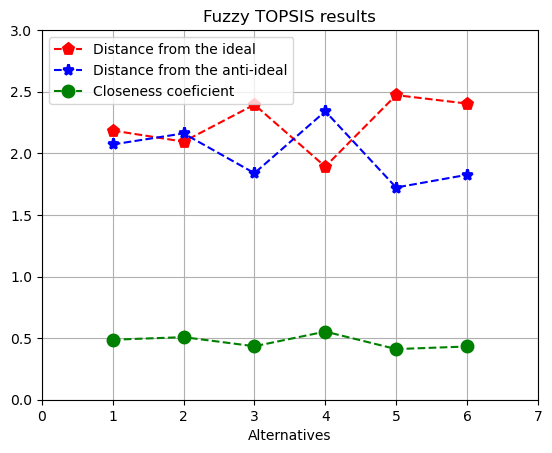

In [34]:
'''
Filename: FuzzyTOPSIS.py
Description: Fuzzy TOPSIS method
Authors: Papathanasiou, J. & Ploskas, N.
'''

from numpy import *
from flask import Flask, render_template, request, redirect, url_for, send_file
import matplotlib.pyplot as plt
import timeit
import io
import base64
import csv
import ast


'''
1. Convert the linguistic variables for the criteria weights or the ratings¶
into fuzzy weights and fuzzy decision matrix, respectively
'''
def cal(a, b, k):
    """ a is the dictionary with the linguistic variables 
    for the criteria weights (or the linguistic variables for the ratings), b is the matrix with 
    the criteria weights (or the ratings), and k is the number of the decision makers. The output is 
    the fuzzy decision matrix or the fuzzy weights of the criteria """
    #print(a,"a")
    #print(b,"b")
    #print(k,"k")
    f = []
    for i in range(len(b)):
        c = []
        for z in range(3):
            x = 0
            for j in range (k):
                #print(i)
                #print(j)
                #print(z)
                x = x + a[b[i][j]][z]
            c.append(round(x / k, 3))
        f.append(c)
    return asarray(f)



'''
Calculate the fuzzy normalized decision matrix
'''
def fndm(a, n, m):
    """ a is the fuzzy decision matrix, 
        n is the number of criteria, and 
        m is the number of the alternatives.
        The output is the fuzzy normalized decision matrix 
    """
    x = amax(a[:, 2:3])
    f = zeros((n * m, 3))
    for i in range(n * m):
        for j in range(3):
            f[i][j] = round(a[i][j] / x, 3)
    return f

'''
Calculate the fuzzy weighted normalized decision matrix¶
'''
def weighted_fndm(a, b, n, m):
    """ a is the fuzzy normalized decision matrix, 
        b is the criteria weights, 
        n is the number of criteria, and 
        m is the number of the alternatives. 
        The output is the fuzzy weighted normalized decision matrix."""
    f = zeros((n * m, 3))
    z = 0
    for i in range(n * m):
        if i % len(b) == 0:
            z = 0
        else:
            z = z + 1
        for j in range(3):
            f[i][j] = round(a[i][j] * b[z][j], 3)
    return f

'''
Calculate the distance between two fuzzy triangular numbers
'''
def distance(a, b):
    """ a and b are fuzzy triangular numbers. The output is their distance """
    return sqrt(1/3 * ((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2))


'''
Determine the fuzzy positive ideal solution (FPIS)
'''
def func_dist_fpis(a, n, m):
    """ a is the fuzzy weighted normalized decision matrix,
        n is the number of criteria, and 
        m is the number of the alternatives. 
        The output is the ideal solution of each criterion."""
    fpis = ones((3, 1))
    dist_pis = zeros(m)
    p = 0
    for i in range(m):
        for j in range(n):
            dist_pis[i] = dist_pis[i] + distance(a[p + j],
                fpis)
        p = p + n
    return dist_pis

'''
Determine the fuzzy negative ideal solution (FNIS)¶
'''
def func_dist_fnis(a, n, m):
    """ a is the fuzzy weighted normalized decision matrix,
        n is the number of criteria, and 
        m is the number of
        the alternatives. The output is the anti-ideal solution of each criterion."""
    fnis = zeros((3, 1))
    dist_nis = zeros(m)
    p = 0
    for i in range(m):
        for j in range(n):
            dist_nis[i] = dist_nis[i] + distance(a[p + j],
                fnis)
        p = p + n
    return dist_nis


'''
Fuzzy TOPSIS method: it calls the other functions
'''
def f_topsis(a, b, c, d, n, m, k, pl):
    """ a is the dictionary with the linguistic variables for the criteria weights, 
        b is the matrix with the importance weights of the criteria, 
        c is a dictionary with the linguistic variables for the ratings, 
        d is the matrix with all the ratings, 
        n is the number of criteria, 
        m is the number of the alternatives, and 
        k is the number of the decision makers """

    # Steps 3 and 4
    fuzzy_weights = cal(a, b, k)
    fuzzy_decision_matrix = cal(c, d, k)
    fuzzy_norm_decision_matrix = fndm(fuzzy_decision_matrix, n, m)

    # Step 5
    weighted_fuzzy_norm_decision_matrix = weighted_fndm(fuzzy_norm_decision_matrix, fuzzy_weights, n, m)

    # Steps 6 and 7
    a_plus = func_dist_fpis(weighted_fuzzy_norm_decision_matrix, n, m)
    a_minus = func_dist_fnis(weighted_fuzzy_norm_decision_matrix, n, m)

    # Step 8
    CC = [] # closeness coefficient
    for i in range(m):
        CC.append(round(a_minus[i] / (a_plus[i] + a_minus[i]), 3))

    if pl == 'y':
        fig = plt.figure()
        q = [i + 1 for i in range(m)]
        line1 = plt.plot(q, a_plus, 'p--',  color = 'red',  markeredgewidth = 2, markersize = 8, label = 'Distance from the ideal')
        line2 = plt.plot(q, a_minus, '*--', color = 'blue', markeredgewidth = 2, markersize = 8, label = 'Distance from the anti-ideal')
        line3 = plt.plot(q, CC, 'o--', color = 'green',     markeredgewidth = 2, markersize = 8, label = 'Closeness coeficient')
        plt.title('Fuzzy TOPSIS results')
        #plt.legend([],[, , ])
        #plt.legend(handles=[line1, line2, line3])
        plt.xticks(range(m + 2))
        plt.axis([0, m + 1, 0, 3])
        plt.xlabel('Alternatives')
        plt.grid(True)
        plt.legend(loc='best')
        #plt.show()
        # Shranjevanje grafa kot slike
        img_path = 'static/fuzzy_topsis_plot.png'  # Ime in pot do slike
        plt.savefig(img_path)
       
    return CC



'''
Herse exter the problem that you want to solve
'''

# Definiramo spremenljivke za shranjevanje podatkov
m, n, k = 0, 0, 0
cw, r, cdw = {}, {}, []
all_ratings = []
tCas = 0.00001

app = Flask(__name__)


#flask routing
@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html")


@app.route("/settings")
def settings0():
    return render_template("settings.html")



# generiramo stran za nalaganje datoteke nastavitev

@app.route('/settings', methods=['POST'])
def settings():
    global cw
    global r
    if request.method == 'POST':
        file = request.files['file']
        if file:
            # Shranjevanje datoteke
            file.save('static/settings_file.csv')  # Shrani v uploadano datoteko
            # Nadaljujemo z uvozom podatkov iz datoteke s pandas
            import pandas as pd

            with open('static/settings_file.csv', 'r') as f:
                reader = csv.reader(f)
                data = dict(reader)
            
            # preberemo podatke, jih priredimo v cw in r
            for key in data:
                data[key] = ast.literal_eval(data[key])

            cw = data['cw']
            r = data['r']
            print("cw: ", cw)
            print("r: ",r)
                    
        #return "Datoteka je bila uspešno naložena in podatki so bili obdelani."
        return redirect(url_for("upload"))
        
    else:
        return "Nobena datoteka ni bila izbrana."


# generiramo stran, izpišemo podatke, ki smo jih že uvozili
@app.route("/upload")
def upload0():
    tempCW = request.args.get('tempCW', cw)
    tempR = request.args.get('tempCW', r)
    #return render_template("upload.html")
    return render_template('upload.html', tempCW=tempCW, tempR=tempR)



# generiramo stran za uvoz podatkov, preberemo in priredimo v cdw in all_ratings
# na koncu zaženemo preračunavanje in pokličemo stran za rezultate z izpisom vseh vhodnih podatov
# in rezultatov
@app.route('/upload', methods=['POST'])
def upload():
    
    global m
    global n
    global k
    global cdw
    global all_ratings
    global tCas
    tempCW = request.args.get('tempCW', cw)
    tempR = request.args.get('tempR', r)
    tempCDW = request.args.get('tempCDW', cdw)
    #tempAll = request.args.get('tempAll', all_ratings)
   
    
    if request.method == 'POST':
        file = request.files['file']
        if file:
            # Shranjevanje datoteke
            file.save('static/uploaded_file.csv')  # Shrani v uploadano datoteko
            # Nadaljuj z uvozom podatkov iz datoteke s pandas
            import pandas as pd

            with open('static/uploaded_file.csv', 'r') as f:
                reader = csv.reader(f)
                data = dict(reader)

            for key in data:
                data[key] = ast.literal_eval(data[key])

            # preberemo podatke, jih priredimo v cdw in all_ratings
            cdw = data['cdw']
            all_ratings = data['all_ratings']

            # Izračun dimenzij
            m = len(all_ratings) // len(cdw)
            k = len(cdw[0])
            n = len(cdw)

            print("m: ", m)
            print("n: ", n)
            print("k: ", k)
            print("cdw: ", cdw)
            print("all_ratings: ",all_ratings)
            print("cw: ", cw)
            print("r: ",r)

            # final results
            start = timeit.default_timer()
            f_topsis(cw, cdw, r, all_ratings, n, m, k, 'n')
            stop = timeit.default_timer()
            tCas = stop - start
            print("Čas: " , tCas)
            
            # pripravimo še vse spremenljivke za izpis na html strani
            print(cal(cw,cdw,k))
            cc = f_topsis(cw, cdw, r, all_ratings, n, m, k, 'y')
            #print("Closeness coefficient = ", f_topsis(cw, cdw, r, all_ratings, n, m, k, 'y'))
            print("Closeness coefficient = ", cc)
            ccId = {f"Alternativa {i+1}": v for i, v in enumerate(cc)}
            ccSort = {k: v for k, v in sorted(ccId.items(), key=lambda item: item[1],reverse=True)}
            print(ccSort)
            tempCDW = {f"Odločevalec {i+1}": odlocitev for i, odlocitev in enumerate(cdw)}
            print("CDW: ", tempCDW)
            
            #tempAll = {f"Alternativa {i//n+1}, Odločevalec {i%n+1}": odlocitev for i, odlocitev in enumerate(all_ratings)}
            #tempAll = {f"Alternativa {i//n+1}": odlocitev for i, odlocitev in enumerate(all_ratings)}
            tempAll = {f"Alternativa {i//n+1}": all_ratings[i:i+n] for i in range(0, len(all_ratings), n)}
            print("tempAll: ", tempAll)
            
        #return "Datoteka je bila uspešno naložena in podatki so bili obdelani."
        #return redirect(url_for("results"))
        # pokličemo stran in nanjo izpišemo vse vhodne podatke in rezultate
        return render_template("results.html", Cas=tCas, res=ccSort,tempCW=tempCW, tempR=tempR, tempCDW=tempCDW, tempAll=tempAll, m=m, n=n, k=k)
    else:
        return "Nobena datoteka ni bila izbrana."


@app.route("/results")
def results():

    return render_template("results.html")


if __name__ =='__main__':
    app.run()
